### Machine Learning Models
1. Dataset downloaded from Kaggle
2. Deploying trained model to make predictions using streamlit python library


#### importing the required python libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import classification_report, accuracy_score

In [5]:
import os

#### Download Datasets 
Download the **Titanic Dataset** from [Kaggle Link](https://www.kaggle.com/c/titanic/data) and place it in same directory as this notebook

In [6]:
train_data = pd.read_csv("train.csv") # load train data
test_data = pd.read_csv("test.csv") # load test data
sample_submission = pd.read_csv("gender_submission.csv") # sample of submission file

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [6]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [8]:
# view of the sample submission file
sample_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

#### EDA - Exploratory Data Analysis

In [9]:
train_len = len(train_data)
test_len = len(test_data)
print("length of Train Data: {}\nlength of Test Data: {}".format(train_len, test_len))

length of Train Data: 891
length of Test Data: 418


In [10]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [11]:
# check the type of data of each feature including the no of NANs
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


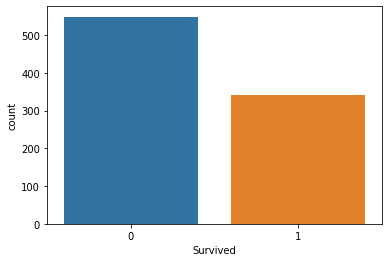

In [12]:
# check the distribution of labels
sns.countplot(x="Survived", data=train_data);

In [13]:
train_data.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

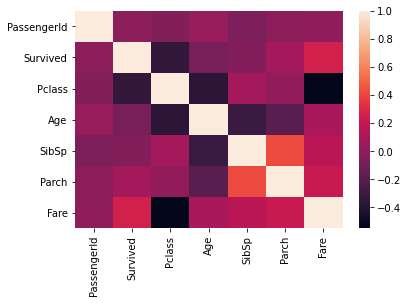

In [14]:
sns.heatmap(train_data.corr());

#### Feature Engineering
Feature engineering is kept minimal since the aim is to demolnstrated how to make submissions to Kaggle competitions

For simplicity, we are going to perform the following operations:
1. drop features such as "PassengerId", "Name", "Cabin", "Ticket"
2. fill NaN "Cabin" with its mode
3. fill NaN of "Age" and "Fare" with either mean or median
2. perform one-hot encoding on "Pclass", "Sex", "Embarked"

Here are other likely feature engineering you can try out:
1. extracting the title from each name
2. new feature "fare per person" = Fare / (SibSp + Parch + 1)
3. scaling features such "Fare" and "Age"
<br>etc.

In [15]:
# merge all the train and test to simplify feature engineering

In [16]:
train_label = train_data.Survived

In [17]:
# new train data with label removed
train_data_new = train_data.drop(["Survived"], axis=1)

In [18]:
all_data = pd.concat([train_data_new, test_data])

In [19]:
all_data.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

In [20]:
len(pd.unique(all_data.Ticket))

929

In [21]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [22]:
all_data.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [23]:
# dropping features
all_data = all_data.drop(["PassengerId", "Name", "Cabin", "Ticket"], axis=1)

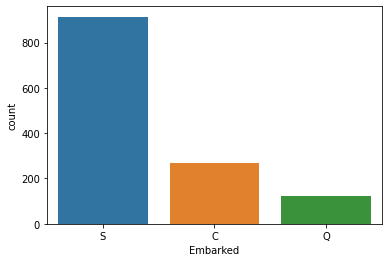

In [24]:
sns.countplot(x="Embarked", data=all_data);

In [25]:
embarked_mode = all_data.Embarked.mode().values[0]
embarked_mode

'S'

In [26]:
# fillling NaN values of embarked column with mode
all_data["Embarked"] = all_data.Embarked.fillna(value=embarked_mode)

In [27]:
all_data["Age"].min()

0.17

In [28]:
all_data["Age"].max()

80.0

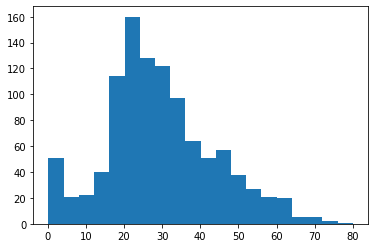

In [29]:
plt.hist(all_data.Age, bins=20);

In [30]:
age_mean = all_data["Age"].mean()

In [31]:
age_mean = round(age_mean)
age_mean

30

In [32]:
# fillling NaN values of "Age" column with mean
all_data["Age"] = all_data.Age.fillna(age_mean)

In [33]:
print("Minumum Fare: {}\nMax Fare: {}".format(all_data.Fare.min(), all_data.Fare.max()))

Minumum Fare: 0.0
Max Fare: 512.3292


In [34]:
fare_mean = all_data["Fare"].mean()

In [35]:
fare_mean = round(fare_mean, 2)
fare_mean

33.3

In [36]:
# fillling NaN value "Fare" column with mean
all_data["Fare"] = all_data.Fare.fillna(value=fare_mean)

In [37]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 114.1+ KB


In [38]:
cat_cols = ["Pclass", "Sex", "Embarked"] # categorical columns

In [39]:
# get one-hot encode of categorical features
all_data_encoded = pd.get_dummies(data=all_data, columns=cat_cols)

In [40]:
all_data_encoded.head()

Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
0  22.0      1      0   7.2500         0         0         1           0   
1  38.0      1      0  71.2833         1         0         0           1   
2  26.0      0      0   7.9250         0         0         1           1   
3  35.0      1      0  53.1000         1         0         0           1   
4  35.0      0      0   8.0500         0         0         1           0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0         1           0           0           1  
1         0           1           0           0  
2         0           0           0           1  
3         0           0           0           1  
4         1           0           0           1

In [41]:
# retrieving the train and test set after performing feature engineering
train_data_encoded = all_data_encoded.iloc[:train_len]
test_data_encoded = all_data_encoded.iloc[train_len:]

In [42]:
train_len == len(train_data_encoded)

True

In [43]:
test_len == len(test_data_encoded)

True

#### splitting the data into train and validation set
For simplicity, we will use train_test_split method to validate our model

In [44]:
X_train, X_val, y_train, y_val = train_test_split(train_data_encoded, train_label)

#### Logistic Regression Base Model

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(X_train, y_train)

LogisticRegression()

In [47]:
val_prediction = lr.predict(X_val)

In [48]:
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_val, y_val)

In [49]:
print("Logistic Regression\nTraining Score: {}\nVal Score: {}".format(train_score, test_score))

Logistic Regression
Training Score: 0.8098802395209581
Val Score: 0.7982062780269058


### Making Test Predictions using Logistic Regression Model
use model to predict test data, save to csv file and submit on Kaggle

In [50]:
test_prediction_lr = lr.predict(test_data_encoded)

In [51]:
test_passenger_id = test_data.PassengerId

In [52]:
sample_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [53]:
my_submission = pd.DataFrame({"PassengerId": test_passenger_id, "Survived": test_prediction_lr})

In [54]:
my_submission.to_csv("logistic_prediction.csv", index=False)

#### Random Forest Base Model

In [55]:
rf_classifier = RandomForestClassifier()

In [56]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
val_prediction = rf_classifier.predict(X_val)

In [58]:
train_score = rf_classifier.score(X_train, y_train)
test_score = rf_classifier.score(X_val, y_val)

In [59]:
print("Random Forest\nTraining Score: {}\nVal Score: {}".format(train_score, test_score))

Random Forest
Training Score: 0.9820359281437125
Val Score: 0.8295964125560538


### Making Test Predictions using Random Forest Model
use model to predict test data, save to csv file and submit on Kaggle

In [60]:
test_prediction_rf = rf_classifier.predict(test_data_encoded)

In [61]:
my_submission = pd.DataFrame({"PassengerId": test_passenger_id, "Survived": test_prediction_rf})

In [62]:
my_submission.to_csv("random_forest_prediction.csv", index=False)

### Parameter Search using GridSearchCV

In [63]:
# Random Forest model
rf_classifier = RandomForestClassifier()

In [64]:
# combination of parameters to search for best model
param_grid = {"n_estimators": [50, 100, 150],
                  "max_depth": [3 , 5, 10]
                 }

In [65]:
s_fold = StratifiedKFold(n_splits=5)

In [66]:
rf_grid = GridSearchCV(rf_classifier, param_grid=param_grid, cv=s_fold)

In [67]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [68]:
rf_grid.best_score_

0.8174054539333409

In [69]:
# check out the cross validation results
pd.DataFrame(rf_grid.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.118614      0.021628         0.010559        0.003355   
1       0.205943      0.034145         0.017621        0.006962   
2       0.299236      0.029591         0.028258        0.004490   
3       0.109904      0.016416         0.007766        0.002435   
4       0.199371      0.040579         0.019235        0.007024   
5       0.470053      0.166548         0.047727        0.016464   
6       0.218420      0.016437         0.021321        0.001247   
7       0.391287      0.048763         0.032865        0.008428   
8       0.447476      0.078932         0.036634        0.009784   

  param_max_depth param_n_estimators                                  params  \
0               3                 50    {'max_depth': 3, 'n_estimators': 50}   
1               3                100   {'max_depth': 3, 'n_estimators': 100}   
2               3                150   {'max_depth': 3, 'n_estimators': 150}   
3               5                 50    {'max_depth': 5, 'n_estimators': 50}   
4               5                100   {'max_depth': 5, 'n_estimators': 100}   
5               5                150   {'max_depth': 5, 'n_estimators': 150}   
6              10                 50   {'max_depth': 10, 'n_estimators': 50}   
7              10                100  {'max_depth': 10, 'n_estimators': 100}   
8              10                150  {'max_depth': 10, 'n_estimators': 150}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.783582           0.791045           0.783582           0.842105   
1           0.776119           0.791045           0.791045           0.819549   
2           0.776119           0.805970           0.798507           0.819549   
3           0.798507           0.791045           0.820896           0.827068   
4           0.805970           0.791045           0.828358           0.827068   
5           0.820896           0.791045           0.820896           0.827068   
6           0.776119           0.798507           0.828358           0.819549   
7           0.791045           0.813433           0.828358           0.827068   
8           0.791045           0.791045           0.828358           0.812030   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.827068         0.805476        0.024392                7  
1           0.834586         0.802469        0.021348                9  
2           0.827068         0.805443        0.017747                8  
3           0.827068         0.812917        0.015167                3  
4           0.834586         0.817405        0.016335                1  
5           0.827068         0.817394        0.013461                2  
6           0.819549         0.808417        0.018904                5  
7           0.804511         0.812883        0.014057                4  
8           0.812030         0.806902        0.014254                6

In [70]:
best_parameters = rf_grid.best_params_

In [71]:
best_parameters

{'max_depth': 5, 'n_estimators': 100}

In [72]:
best_rf = RandomForestClassifier(**best_parameters)

In [73]:
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [75]:
# validation predictions
val_prediction = best_rf.predict(X_val)

In [76]:
train_score = best_rf.score(X_train, y_train)
test_score = best_rf.score(X_val, y_val)

### Making Test Predictions using Random Forest with GridSearchCV
use model to predict test data, save to csv file and submit on Kaggle

In [77]:
print("Random Forest with GridSearchCV\nTraining Score: {}\n"\
"Val Score: {}".format(train_score, test_score))

Random Forest with GridSearchCV
Training Score: 0.8398203592814372
Val Score: 0.8295964125560538


In [78]:
# prediction using GridSearch Random Forests
test_prediction_rf_grid = best_rf.predict(test_data_encoded)

In [79]:
my_submission = pd.DataFrame({"PassengerId": test_passenger_id, "Survived": test_prediction_rf_grid})

In [80]:
my_submission.to_csv("random_forest_grid_prediction.csv", index=False)